# Unzip Data for YOLO v8n
The dataset used for training was downloaded from https://universe.roboflow.com/fruitsdetection/fruits-by-yolo/dataset/1. Zip the dataset, name it as "Fruit_yolov8.zip" before uploading to CoLab. NOTE: The is a labeled dataset.

In [1]:
# unzip fruit dataset uploaded from local PC into data_v8 folder
!unzip -q /content/Fruits_yolov8.zip -d /content/data_v8/

# Install Required Libraries

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 96.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 81.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

# Train YOLO v8n Model

In [3]:
!yolo detect train data=/content/data_v8/data.yaml model=yolov8n.pt epochs=40 imgsz=640

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 6.25M/6.25M [00:00<00:00, 126MB/s]
Ultralytics 8.3.95 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data/data.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybri

# Validate Trained YOLO v8n Model

In [4]:
!yolo detect val data=/content/data_v8/data.yaml model=runs/detect/train/weights/best.pt epochs=60 imgsz=640

Ultralytics 8.3.95 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,403 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/data/valid/labels.cache... 187 images, 1 backgrounds, 0 corrupt: 100% 187/187 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 390, len(boxes) = 394. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 12/12 [00:04<00:00,  2.81it/s]
                   all        187        394      0.715       0.76      0.756      0.603
                 Apple         16         20       0.89          1       0.99      0.918
                Banana         27         65      0.731      0.369      0.519      0.328
                Grapes         25         39      0.672

# Test Trained YOLO v8n Model

In [5]:
!yolo detect predict model=runs/detect/train/weights/best.pt source=data/test/images save=True

Ultralytics 8.3.95 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,403 parameters, 0 gradients, 8.1 GFLOPs

image 1/90 /content/data/test/images/Image_14_jpg.rf.ecc1548e5fcf36a2f6a4dac782c610cb.jpg: 640x640 1 Pineapple, 9.4ms
image 2/90 /content/data/test/images/Image_15_jpg.rf.877b7bbbb7e890a0cff46dab41257813.jpg: 640x640 22 Watermelons, 7.5ms
image 3/90 /content/data/test/images/Image_17_jpg.rf.ebdc73183305982b5212f72f55523da8.jpg: 640x640 10 Kiwis, 7.5ms
image 4/90 /content/data/test/images/Image_1_jpg.rf.64c9a3a9b8ce63a44eb223c4d82302f0.jpg: 640x640 1 Banana, 12.8ms
image 5/90 /content/data/test/images/Image_20_jpg.rf.b76a31139cb3f4f25f238f2d88bfc793.jpg: 640x640 4 Mangos, 7.8ms
image 6/90 /content/data/test/images/Image_22_jpg.rf.3ee71c57ea0fb3c85800d7fe1ef3fd88.jpg: 640x640 2 Grapess, 7.5ms
image 7/90 /content/data/test/images/Image_24_jpg.rf.cbd971d4d92b4d7f7285a4f5ad8e2314.jpg: 640x640 1 Watermelon, 7.5ms
image 8/90 /conten

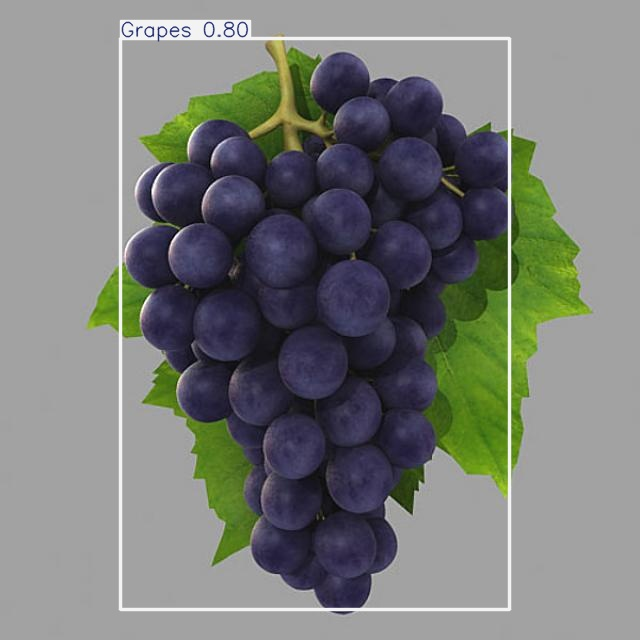

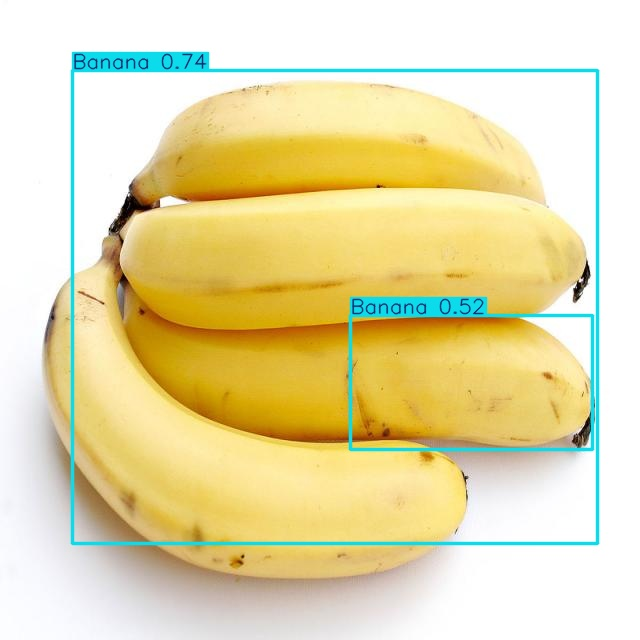

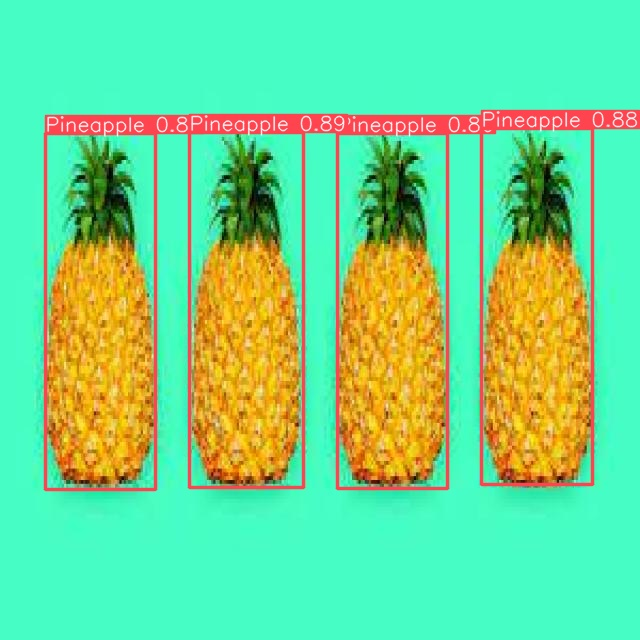

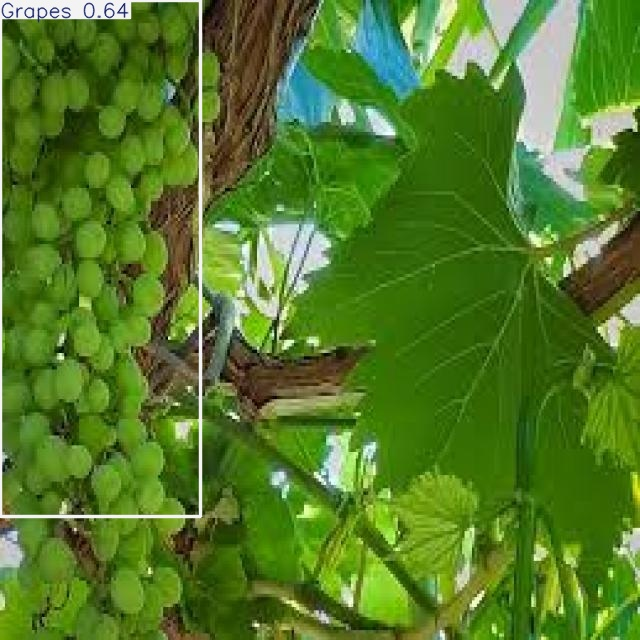

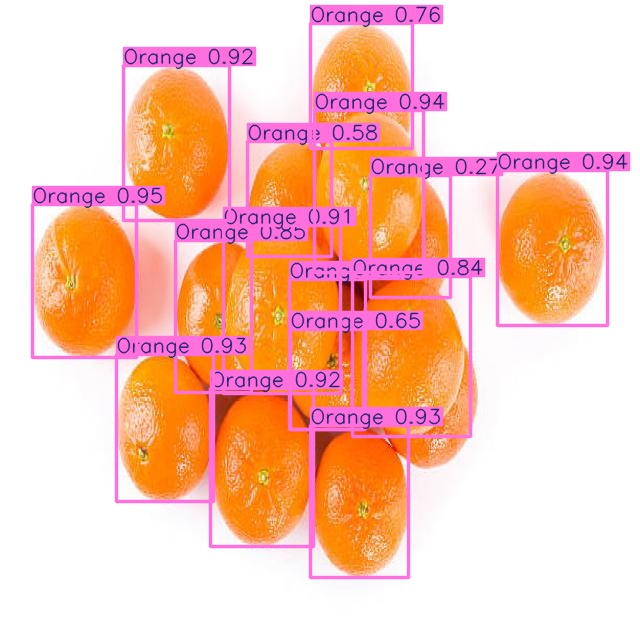

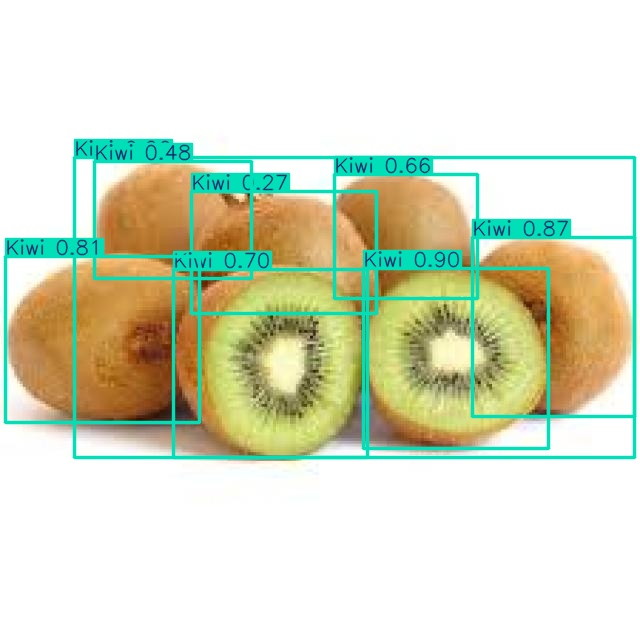

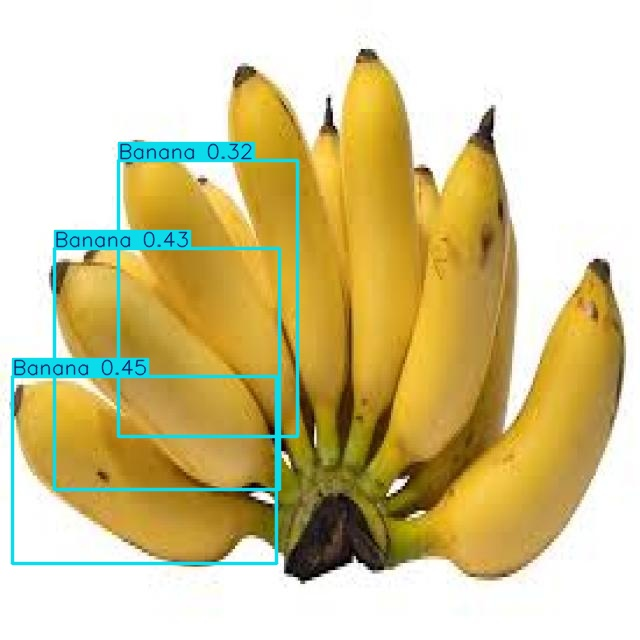

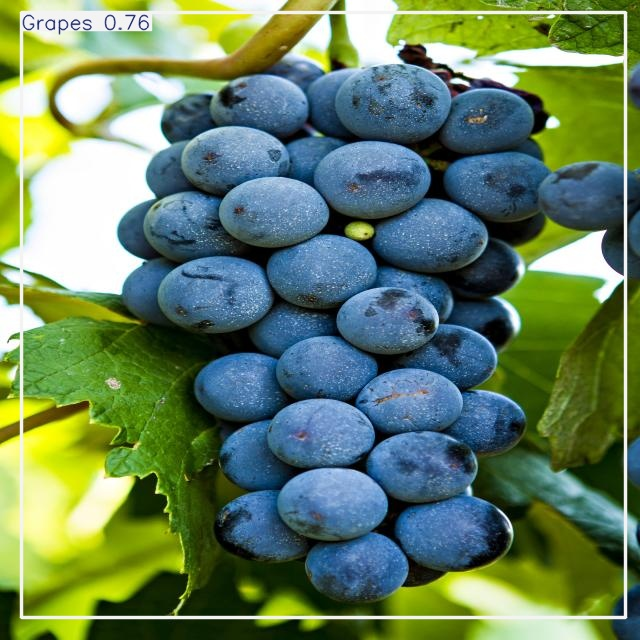

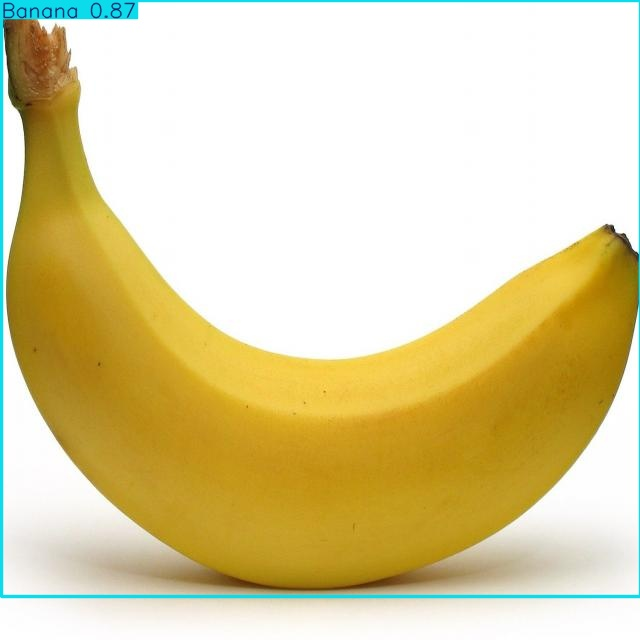

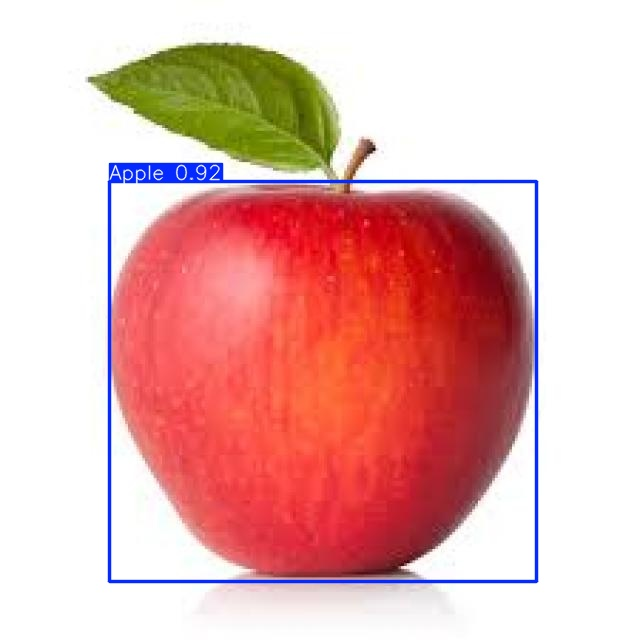

In [6]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:10]:
  display(Image(filename=image_path, height=400))
  print('\n')

# Output YOLO v8n

In [7]:
# Create "my_model/yolo_v8n" folder to store model weights and train results
!mkdir -p /content/my_model/yolo_v8n
!cp /content/runs/detect/train/weights/best.pt /content/my_model/yolo_v8n/yolo_v8n.pt
!cp -r /content/runs/detect/train /content/my_model/yolo_v8n

# Unzip Data for YOLO v11n
The dataset used for training was downloaded from https://universe.roboflow.com/fruitsdetection/fruits-by-yolo/dataset/1. Zip the dataset, name it as "Fruit_yolov11.zip" before uploading to CoLab. NOTE: The is a labeled dataset.

In [10]:
# unzip fruit dataset uploaded from local PC into data_v8 folder
!unzip -q /content/Fruits_yolov11.zip -d /content/data_v11

# Train YOLO v11n Model

In [11]:
!yolo detect train data=/content/data_v11/data.yaml model=yolo11n.pt epochs=40 imgsz=640

Ultralytics 8.3.95 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/data_v11/data.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_box

# Validate Trained YOLO v11n Model

In [12]:
!yolo detect val data=/content/data_v11/data.yaml model=runs/detect/train2/weights/best.pt epochs=60 imgsz=640

Ultralytics 8.3.95 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,907 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/data_v11/valid/labels.cache... 187 images, 1 backgrounds, 0 corrupt: 100% 187/187 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 390, len(boxes) = 394. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 12/12 [00:03<00:00,  3.02it/s]
                   all        187        394      0.808      0.694      0.763      0.602
                 Apple         16         20      0.994          1      0.995      0.922
                Banana         27         65      0.855      0.446      0.671      0.434
                Grapes         25         39    

# Test Trained YOLO v11n Model

In [13]:
!yolo detect predict model=runs/detect/train2/weights/best.pt source=data_v11/test/images save=True

Ultralytics 8.3.95 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,907 parameters, 0 gradients, 6.3 GFLOPs

image 1/90 /content/data_v11/test/images/Image_14_jpg.rf.ecc1548e5fcf36a2f6a4dac782c610cb.jpg: 640x640 1 Pineapple, 12.3ms
image 2/90 /content/data_v11/test/images/Image_15_jpg.rf.877b7bbbb7e890a0cff46dab41257813.jpg: 640x640 21 Watermelons, 10.2ms
image 3/90 /content/data_v11/test/images/Image_17_jpg.rf.ebdc73183305982b5212f72f55523da8.jpg: 640x640 2 Kiwis, 11.1ms
image 4/90 /content/data_v11/test/images/Image_1_jpg.rf.64c9a3a9b8ce63a44eb223c4d82302f0.jpg: 640x640 1 Banana, 8.9ms
image 5/90 /content/data_v11/test/images/Image_20_jpg.rf.b76a31139cb3f4f25f238f2d88bfc793.jpg: 640x640 3 Mangos, 9.4ms
image 6/90 /content/data_v11/test/images/Image_22_jpg.rf.3ee71c57ea0fb3c85800d7fe1ef3fd88.jpg: 640x640 3 Grapess, 1 Pineapple, 9.0ms
image 7/90 /content/data_v11/test/images/Image_24_jpg.rf.cbd971d4d92b4d7f7285a4f5ad8e2314.jpg: 6

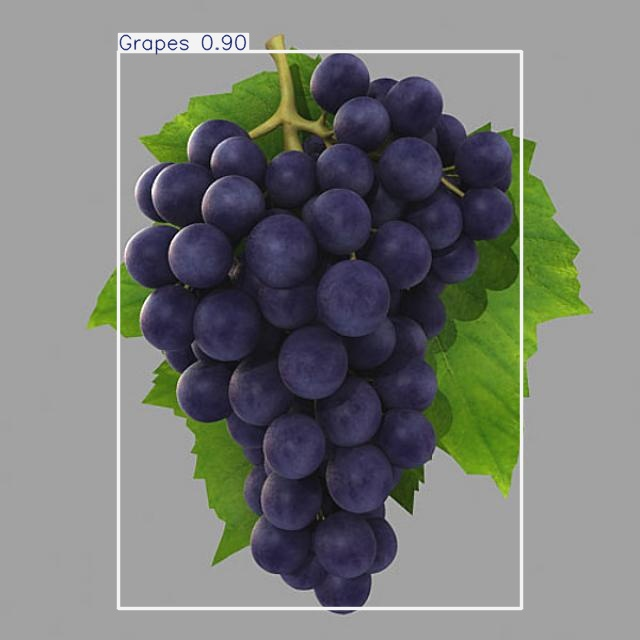

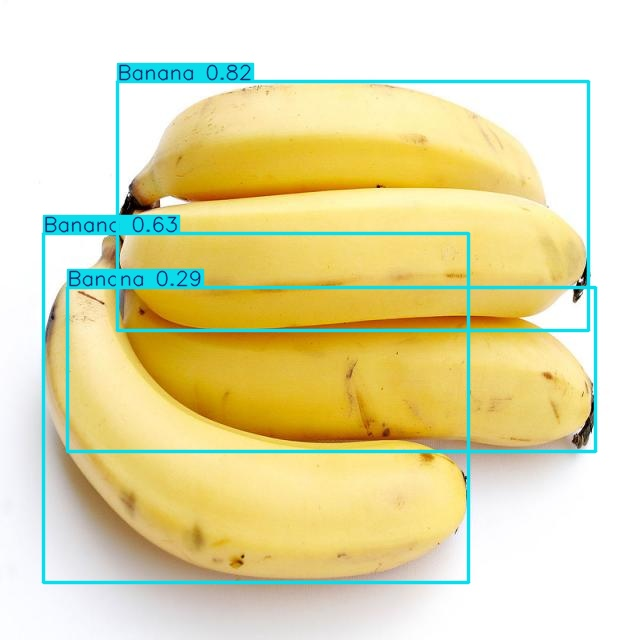

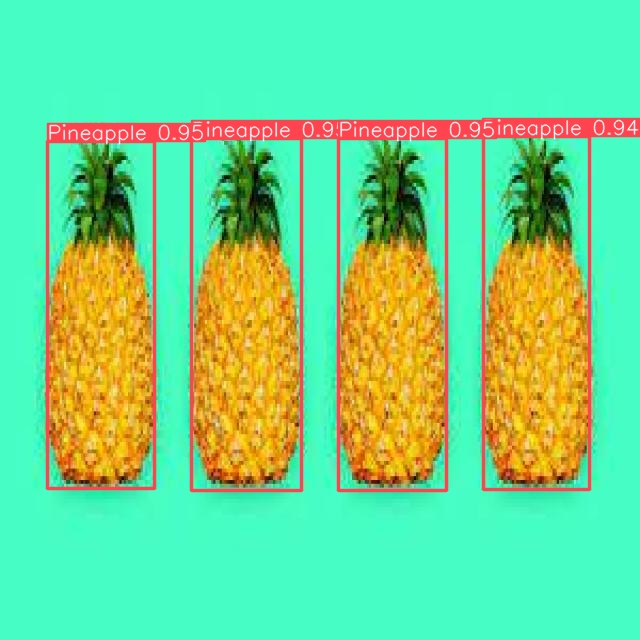

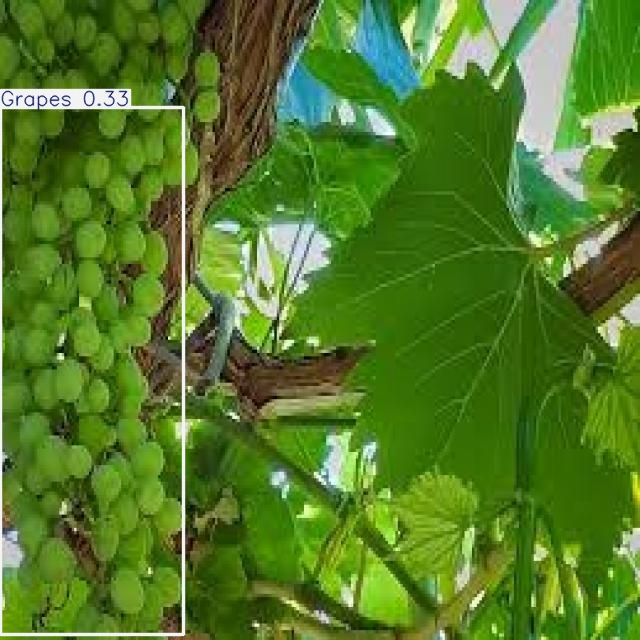

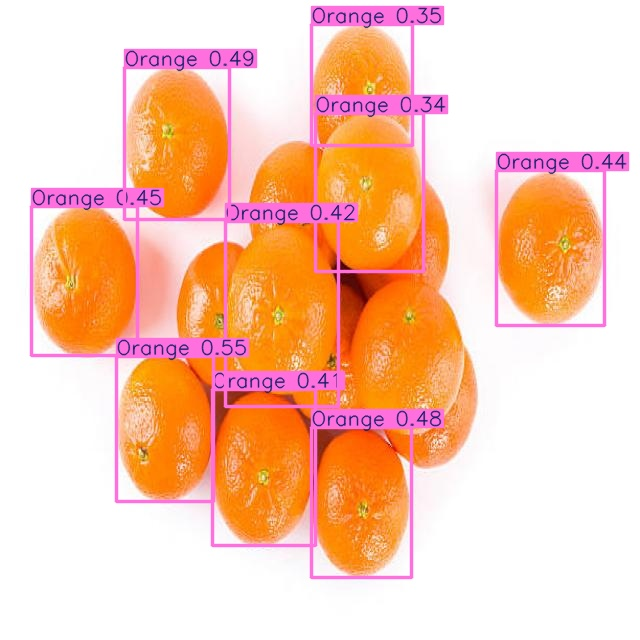

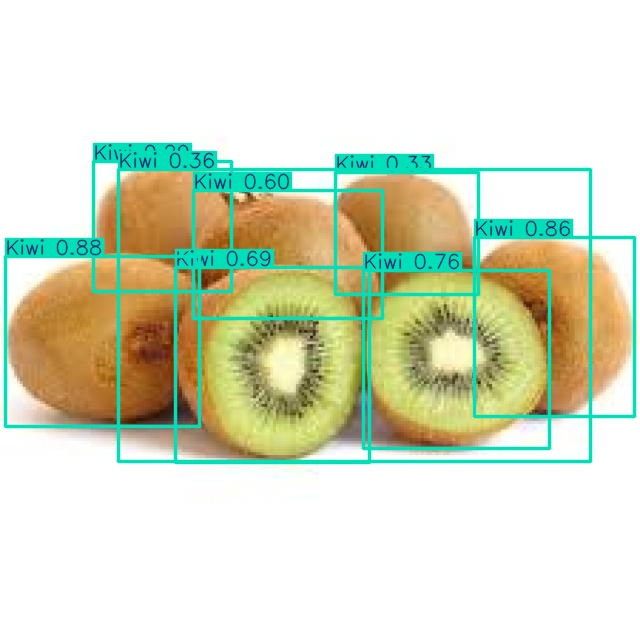

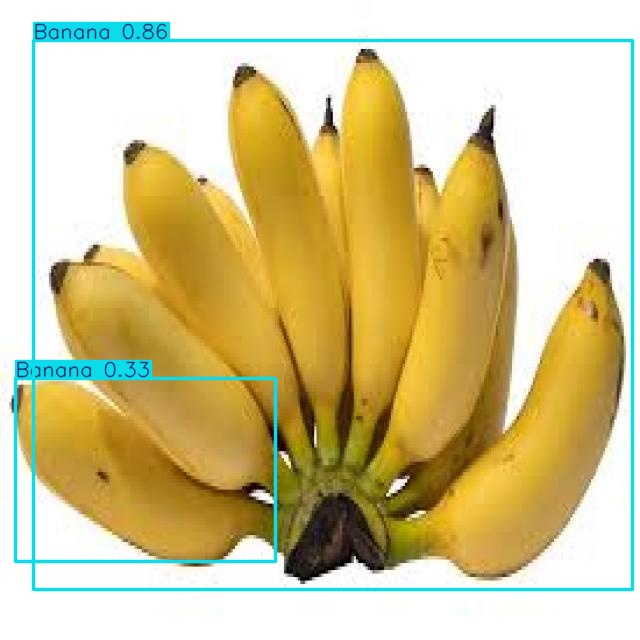

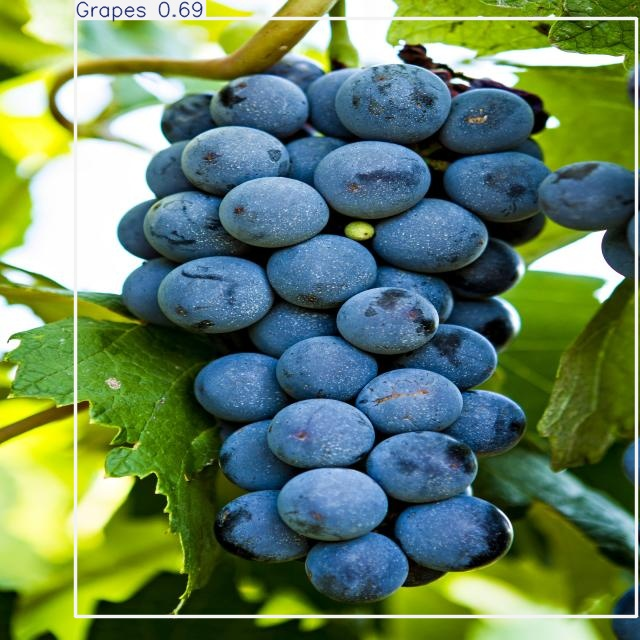

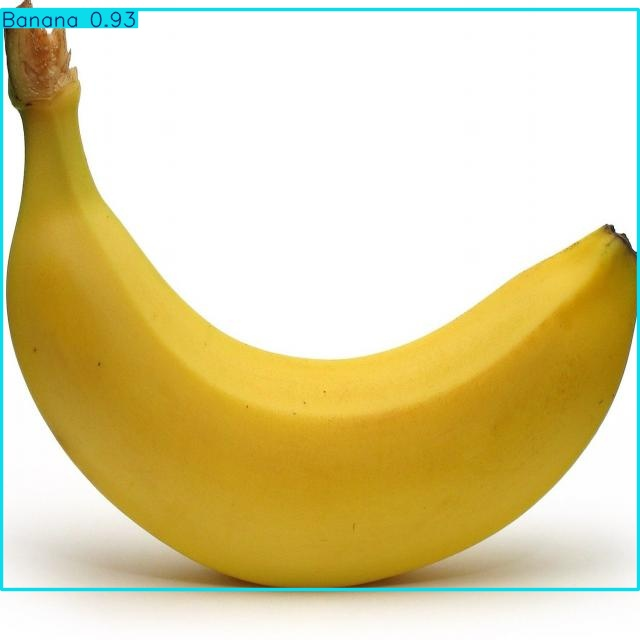

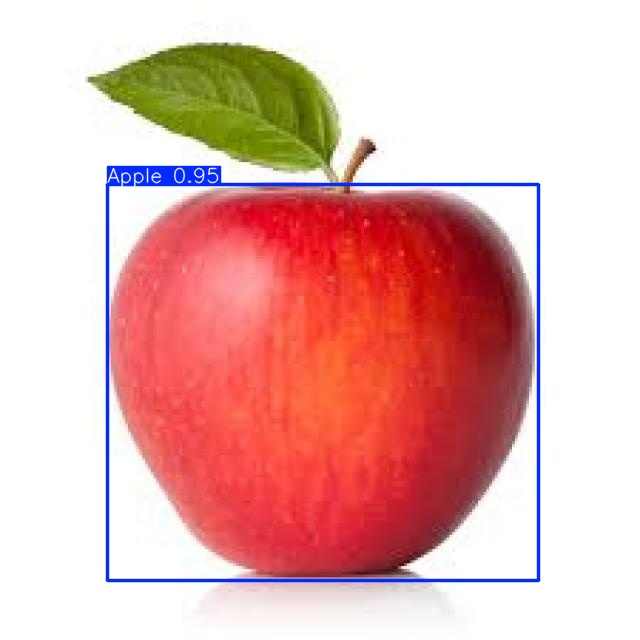

In [14]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict2/*.jpg')[:10]:
  display(Image(filename=image_path, height=400))
  print('\n')

# Output YOLO v11n

In [15]:
# Create "my_model/yolo_v11n" folder to store model weights and train results
!mkdir -p /content/my_model/yolo_v11n
!cp /content/runs/detect/train2/weights/best.pt /content/my_model/yolo_v11n/yolo_v11n.pt
!cp -r /content/runs/detect/train2 /content/my_model/yolo_v11n

# Zip Trained Results

In [16]:
# Zip into "my_model.zip"
!zip -r /content/my_model.zip my_model

  adding: my_model/ (stored 0%)
  adding: my_model/yolo_v11n/ (stored 0%)
  adding: my_model/yolo_v11n/yolo_v11n.pt (deflated 10%)
  adding: my_model/yolo_v11n/train2/ (stored 0%)
  adding: my_model/yolo_v11n/train2/val_batch1_pred.jpg (deflated 10%)
  adding: my_model/yolo_v11n/train2/val_batch0_pred.jpg (deflated 7%)
  adding: my_model/yolo_v11n/train2/R_curve.png (deflated 7%)
  adding: my_model/yolo_v11n/train2/train_batch0.jpg (deflated 4%)
  adding: my_model/yolo_v11n/train2/results.csv (deflated 61%)
  adding: my_model/yolo_v11n/train2/results.png (deflated 7%)
  adding: my_model/yolo_v11n/train2/train_batch5072.jpg (deflated 10%)
  adding: my_model/yolo_v11n/train2/train_batch2.jpg (deflated 6%)
  adding: my_model/yolo_v11n/train2/confusion_matrix_normalized.png (deflated 19%)
  adding: my_model/yolo_v11n/train2/train_batch5070.jpg (deflated 6%)
  adding: my_model/yolo_v11n/train2/val_batch0_labels.jpg (deflated 8%)
  adding: my_model/yolo_v11n/train2/train_batch5071.jpg (defla